# Wine Data로 Linear Regression

In [2]:
import os
import pandas as pd

In [3]:
DATASET_DIR = os.path.join(os.path.dirname(os.getcwd()), 'datasets')
DATASET_DIR

'C:\\Users\\student\\Desktop\\multicampus_lecture\\ML\\datasets'

In [4]:
red_file = os.path.join(DATASET_DIR, 'winequality-red.csv')
white_file = os.path.join(DATASET_DIR, 'winequality-white.csv')

In [8]:
wine_red = pd.read_csv(red_file, sep=';')
wine_white = pd.read_csv(white_file, sep=';')

In [256]:
wine_red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [257]:
wine_red.loc[1, 'chlorides']

0.098

In [258]:
wine_red.iloc[1, 4]

0.098

In [9]:
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
len(wine_red), len(wine_white)

(1599, 4898)

In [ ]:
# wine_red
### -----feature설명----- ###
# fixed_acidity - 고정 산도
# volatile acidity - 휘발성 산도
# citric acid - 구연산
# residual sugar - 잔류 설탕
# chlorides - 염화물
# free sulfur dioxide - free 이산화황
# total sulfur dioxide - 총 이산화황
# density - 밀도
# pH - pH
# sulphates - 황산염
# alcohol - 알코올
# 출력 변수 (감각 데이터 기준) :
# quality - 품질 (0에서 10 사이의 점수)

### red wine

In [12]:
wine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [268]:
# wine_red.max(axis=0)
wine_red.drop('pH', axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,0.80,10.5,5


In [13]:
wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
red_corr = wine_red.corr()
red_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [15]:
wine_red.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

## Simple Linear Regreesion

### 0. Split train_test



In [22]:
new_red = wine_red.copy()
new_red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [23]:
# 무작위 추출법
from sklearn.model_selection import train_test_split

train_red, test_red = train_test_split(new_red, test_size=0.2, random_state=42)

In [25]:
train_red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
493,8.7,0.69,0.31,3.0,0.086,23.0,81.0,1.0002,3.48,0.74,11.6,6
354,6.1,0.21,0.40,1.4,0.066,40.5,165.0,0.9912,3.25,0.59,11.9,6


In [26]:
test_red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.5,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.6,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5


In [27]:
new_red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
# StratifiedShuffleSplit - 층화추출법
from sklearn.model_selection import StratifiedShuffleSplit

# n_splits -> 몇번 자를지?
# test_size -> test ratio
# random_state -> 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(new_red, new_red['quality']):
    strat_train_red = new_red.iloc[train_index]
    strat_test_red = new_red.iloc[test_index]
 

In [270]:
### 또는
from sklearn.model_selection import train_test_split
train_red, test_red = train_test_split(new_red, test_size=0.2, random_state=42, stratify=new_red['quality'])

In [29]:
train_red['quality'].value_counts()/len(train_red)

5    0.426114
6    0.398749
7    0.124316
4    0.032838
8    0.011728
3    0.006255
Name: quality, dtype: float64

In [30]:
new_red['quality'].value_counts()/len(new_red)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

In [132]:
(new_red['quality'].value_counts()/len(new_red))-train_red['quality'].value_counts()/len(train_red)

5   -2.229697e-04
6    2.503519e-04
7    1.369112e-04
4    3.075613e-04
8   -4.708768e-04
3   -9.779372e-07
Name: quality, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [33]:
# linear Regression Model - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# ---------------------------------------------------------------------------------------------
# LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None):
# fit_intercept: <bool>: intercept 계산 여부 (default=True)
# normalize: <bool>: fit_intercept가 True일때만 사용됨. 정규화 (default=False)
# copy_X: X데이터를 덮어씌울지(normalize)
# n_jobs: 최적화 분산작업 (-1은 허용하는 모든 CPU) (default=None=1)
lr_model = LinearRegression()

#### Alchol 과 quality의 Simple Linear Regression

In [35]:
train_red['alcohol'].head(5)

1542    10.75
1558     9.50
344     10.70
924     11.20
971     10.90
Name: alcohol, dtype: float64

In [37]:
train_red['alcohol'].shape

(1279,)

In [41]:
train_red['alcohol'].values

array([10.75,  9.5 , 10.7 , ..., 10.3 , 11.2 , 12.  ])

In [40]:
train_red['alcohol'].values.reshape(1, -1)

array([[10.75,  9.5 , 10.7 , ..., 10.3 , 11.2 , 12.  ]])

In [42]:
len(train_red['quality']), len(train_red['alcohol'])

(1279, 1279)

In [43]:
# 항이 하나여도 2차원 배열로 들어가야함. --> 일반화
# 벡터는 기본적으로 열벡터
X = train_red['alcohol'].values.reshape(-1, 1)
y = train_red['quality']
print(X.shape)

lr_model = LinearRegression()
lr_model.fit(X, y)


(1279, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
lr_model.coef_

array([0.36513322])

In [45]:
lr_model.intercept_

1.8309049862411086

In [46]:
# Returns the coefficient of determination R^2 of the prediction.  
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).  
# sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().  
# The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).  
# A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
lr_model.score(X, y)

0.23155091505246325

### model.score

$$R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$  

**SST: Sum of Square Total로 편차의 제곱합**  

$$SST = \sum_{i=1}^{n}(y_i-\hat{y_i}+\hat{y_i}-\bar{y})^2 = \sum_{i=1}^{n}(y_i-\bar{y})^2 $$  

**SSR: Sum of Square Regression 회귀식과 평균값의 차이**  
$$SSR = \sum(\hat{y}_i-\bar{y})^2$$


**note: 학습데이터에 대한 모델의 신뢰도를 쉽게 파악할 수 있다는 장점**

In [ ]:
lr_model.coef_, lr_model.intercept_

##### Train Set

In [47]:
lr_model.score(X, y)

0.23155091505246325

In [48]:
lr_model.predict(X)

array([5.75608709, 5.29967057, 5.73783043, ..., 5.59177714, 5.92039704,
       6.21250361])

In [49]:
from sklearn.metrics import r2_score
train_pred = lr_model.predict(X)
r2_score(y, train_pred) # 같음

0.23155091505246328

In [50]:
from sklearn.metrics import mean_squared_error

train_pred = lr_model.predict(X)
mean_squared_error(train_pred, y)

0.502086542013329

##### Test Set

In [51]:
X_test = test_red['alcohol'].values.reshape(-1, 1)
y_test = test_red['quality']

In [52]:
lr_model.score(X_test, y_test)

0.2070421320468614

In [53]:
test_pred = lr_model.predict(X_test)

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test, test_pred) # 같음

0.2070421320468614

In [55]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, test_pred)

0.5116746492467928

#### 확인

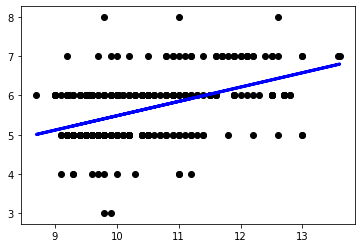

In [56]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, test_pred, color='blue', linewidth=3)
plt.show()

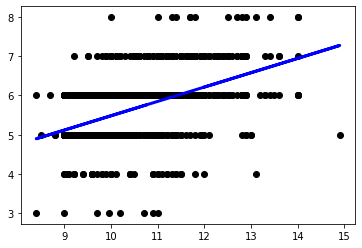

In [57]:
plt.scatter(X, y, color='black')
plt.plot(X, train_pred, color='blue', linewidth=3)
plt.show()

# 실습1. White Wine으로 X=alcohol  , y=Quality Linear Regression

In [77]:
new_white = wine_white.copy()

In [79]:
from sklearn.model_selection import train_test_split 

In [117]:
# StratifiedShuffleSplit - 층화추출법
from sklearn.model_selection import StratifiedShuffleSplit

# n_splits -> 몇번 자를지?
# test_size -> test ratio
# random_state -> 
split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
for train_index, test_index in split.split(new_white, new_white['quality']):
    strat_train_red = new_white.iloc[train_index]
    strat_test_red = new_white.iloc[test_index]
 

[3690 3463  683 ... 1627 2904 3514]


In [81]:
train_white, test_white = train_test_split(new_white, random_state=42, test_size=.2, stratify=new_white['quality'])

In [94]:
X = train_white['alcohol'].values.reshape(-1, 1)
y = train_white['quality']

In [95]:
len(X), len(y)

(3918, 3918)

In [96]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
model.score(X, y)

0.19067763844630373

In [120]:
train_pred = model.predict(X)
train_pred

array([6.19173191, 6.63373435, 5.52872825, ..., 5.52872825, 5.97073069,
       6.85473556])

In [121]:
mean_squared_error(train_pred, y)

0.6345028468285059

In [122]:
test_X = test_white['alcohol'].values.reshape(-1, 1)
test_y = test_white['quality']

In [123]:
model.score(test_X, test_y)

0.18583074260922805

In [128]:
test_pred = model.predict(test_X)
test_pred[:5]

array([5.59187146, 5.81287268, 5.93915909, 5.68658627, 6.98102197])

In [129]:
mean_squared_error(test_y, test_pred)

0.6391279534902653

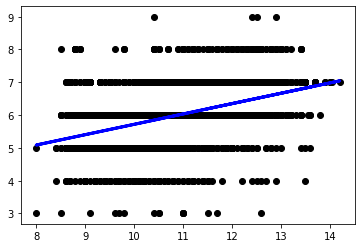

In [130]:
plt.scatter(X, y, color='black')
plt.plot(X, train_pred, color='blue', linewidth=3)
plt.show()

# Multivariate Linear regression 

In [133]:
y = new_red['quality']
X = new_red.drop('quality', axis=1)
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [141]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [142]:
train_X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1542,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.50


In [143]:
train_y.head(2)

1542    6
1558    5
Name: quality, dtype: int64

### Multivariate

In [144]:
len(train_y)

1279

In [145]:
lr_model = LinearRegression()
lr_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
lr_model.coef_

array([-1.06741188e-03, -1.06914193e+00, -1.40505853e-01,  2.04602808e-03,
       -1.63514857e+00,  6.29211736e-03, -3.85423158e-03, -2.22138600e+00,
       -6.04326120e-01,  7.66862347e-01,  2.97529740e-01])

In [147]:
lr_model.intercept_

7.073186277094255

In [148]:
list(zip(train_X.columns, lr_model.coef_))

[('fixed acidity', -0.001067411884093129),
 ('volatile acidity', -1.0691419349115074),
 ('citric acid', -0.14050585295148518),
 ('residual sugar', 0.0020460280795851194),
 ('chlorides', -1.6351485683528735),
 ('free sulfur dioxide', 0.006292117359521723),
 ('total sulfur dioxide', -0.0038542315801046376),
 ('density', -2.221385998008349),
 ('pH', -0.6043261199782846),
 ('sulphates', 0.7668623466495305),
 ('alcohol', 0.29752974015020534)]

##### Train Set

In [149]:
train_predict = lr_model.predict(train_X)
train_predict[:2]

array([5.50831104, 5.04077727])

In [150]:
lr_model.score(train_X, train_y)

0.356179580335317

In [151]:
mean_squared_error(train_predict, train_y)

0.4206571060060278

##### Test Set

In [152]:
test_predict = lr_model.predict(test_X)
test_predict[:2]

array([6.32922267, 5.46660305])

In [153]:
lr_model.score(test_X, test_y)

0.37025045490789643

In [154]:
mean_squared_error(test_predict, test_y)

0.40636065372564295

# 실습2. White Wine으로 X=모든 Features  , y=Quality Linear Regression

# 실습3. White와 Red를 합쳐서 실습 X=모든Feature  , y=Quality Linear Regression

In [204]:
new_red = wine_red.copy()
new_white = wine_white.copy()

new_red['class'] = 0 # red
new_white['class'] = 1 #white

In [206]:
wine= new_red.append(new_white, ignore_index=True)
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0


In [207]:
wine.tail(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1


In [208]:
from sklearn.model_selection import train_test_split

In [209]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
class                   6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [210]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [211]:
X = wine.drop('quality', axis=1)
y = wine['quality']

In [212]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=wine['class'], random_state=42)

In [213]:
train_X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
5797,7.9,0.36,0.53,12.9,0.049,63.0,139.0,0.99792,2.94,0.45,9.1,1
1532,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9,0


In [214]:
train_y.head(2)

5797    5
1532    6
Name: quality, dtype: int64

In [215]:
lr_model = LinearRegression()
lr_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [216]:
lr_model.coef_

array([ 8.68218941e-02, -1.44616483e+00, -5.63540214e-03,  6.40043390e-02,
       -4.68745750e-01,  4.95806324e-03, -1.63877996e-03, -1.07309625e+02,
        4.81799843e-01,  7.63452358e-01,  2.14272161e-01, -3.29216387e-01])

In [217]:
lr_model.intercept_

108.19166061077348

In [218]:
list(zip(train_X.columns, lr_model.coef_))

[('fixed acidity', 0.086821894145704),
 ('volatile acidity', -1.44616482773429),
 ('citric acid', -0.005635402138897708),
 ('residual sugar', 0.064004338952539),
 ('chlorides', -0.4687457497484336),
 ('free sulfur dioxide', 0.004958063244750498),
 ('total sulfur dioxide', -0.0016387799647371464),
 ('density', -107.30962535275562),
 ('pH', 0.48179984305894796),
 ('sulphates', 0.763452357681332),
 ('alcohol', 0.21427216144415964),
 ('class', -0.32921638672421993)]

##### Train Set

In [219]:
train_predict = lr_model.predict(train_X)
train_predict[:2]

array([5.53548652, 5.53919794])

In [221]:
lr_model.score(train_X, train_y)

0.29361572782411505

In [222]:
mean_squared_error(train_predict, train_y)

0.5417286609390416

##### Test Set

In [223]:
test_predict = lr_model.predict(test_X)
test_predict[:2]

array([5.90277551, 6.43379017])

In [224]:
lr_model.score(test_X, test_y)

0.3030924977964754

In [225]:
mean_squared_error(test_predict, test_y)

0.5216685685057747

In [ ]:
df.append(df2, ignore_index=True)
# or
a = df.append(df2)
a.reset_index()

# 실습4. White와 Red를 합쳐서 실습 X=모든Feature  , y=pH


In [271]:
new_red = wine_red.copy()
new_white = wine_white.copy()

new_red['class'] = 0   # red
new_white['class'] = 1 # white

In [272]:
wine= new_red.append(new_white, ignore_index=True)
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0


In [273]:
wine.tail(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1


In [274]:
from sklearn.model_selection import train_test_split

In [275]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
class                   6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [276]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [233]:
X = wine.drop('pH', axis=1)
y = wine['pH']

In [277]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=wine['class'], random_state=42)

In [278]:
train_X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,class
5797,7.9,0.36,0.53,12.9,0.049,63.0,139.0,0.99792,0.45,9.1,5,1
1532,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,0.68,9.9,6,0


In [237]:
train_y.head(2)

5797    2.94
1532    3.21
Name: pH, dtype: float64

In [279]:
lr_model = LinearRegression()
lr_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [280]:
lr_model.coef_

array([-1.17386080e-01, -4.75426521e-02, -6.46555707e-02, -3.90343673e-02,
       -6.18024911e-01,  3.75893551e-04, -7.91924767e-05,  9.36422610e+01,
       -5.49797991e-02,  1.01130841e-01,  8.98043248e-03,  5.34693244e-02])

In [281]:
lr_model.intercept_

-89.92374486434574

In [282]:
list(zip(train_X.columns, lr_model.coef_))

[('fixed acidity', -0.11738607982321435),
 ('volatile acidity', -0.047542652060870425),
 ('citric acid', -0.06465557071891526),
 ('residual sugar', -0.03903436734766033),
 ('chlorides', -0.6180249105516286),
 ('free sulfur dioxide', 0.0003758935505005591),
 ('total sulfur dioxide', -7.919247671459442e-05),
 ('density', 93.64226097689568),
 ('sulphates', -0.05497979905235922),
 ('alcohol', 0.10113084067818497),
 ('quality', 0.008980432477279303),
 ('class', 0.05346932437010905)]

##### Train Set

In [284]:
train_predict = lr_model.predict(train_X)
train_predict[:2]

array([3.01777558, 3.34868238])

In [285]:
lr_model.score(train_X, train_y)

0.6071844159609732

In [286]:
mean_squared_error(train_predict, train_y)

0.010097466262507224

##### Test Set

In [287]:
test_predict = lr_model.predict(test_X)
test_predict[:2]

array([3.30569714, 3.11211687])

In [288]:
lr_model.score(test_X, test_y)

0.6230239687346896

In [289]:
mean_squared_error(test_predict, test_y)

0.009902299447645922

In [290]:
lr_model = LinearRegression(normalize=True)
lr_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [291]:
list(zip(train_X.columns, lr_model.coef_))

[('fixed acidity', -0.11738607982321447),
 ('volatile acidity', -0.04754265206086223),
 ('citric acid', -0.0646555707189256),
 ('residual sugar', -0.03903436734766061),
 ('chlorides', -0.6180249105516106),
 ('free sulfur dioxide', 0.00037589355050061414),
 ('total sulfur dioxide', -7.91924767145423e-05),
 ('density', 93.64226097689587),
 ('sulphates', -0.05497979905236671),
 ('alcohol', 0.1011308406781874),
 ('quality', 0.008980432477277615),
 ('class', 0.053469324370103426)]